<h1><span style='font-family: "Trebuchet MS", Helvetica, sans-serif;'>NLP Part-1 - IMDb Movie Reviews' Sentiment Classifier
</span></h1>

<h4><ul>
    <li>
        <span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"><strong>DOMAIN:</strong> Digital content and entertainment industry</span>
    </li>
</ul></h4>

<h4><ul>
    <li>
        <article><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">CONTEXT:</span></strong></article>
    </li>
</ul>
<article>
    <font face="Trebuchet MS, Helvetica, sans-serif">The objective of this project is to build a text classification model that 
analyses the customer's sentiments based on their reviews in the IMDB database. The 
model uses a complex deep learning model to build an embedding layer followed by 
a classification algorithm to analyse the sentiment of the customers.</font>
</article> </h4>

<h4><ul>
    <li>
        <article><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"><strong>DATA DESCRIPTION:</strong></span></article>
    </li>
</ul>
<article><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">The Dataset of 50,000 movie reviews from IMDB, labelled by 
sentiment (positive/negative). Reviews have been preprocessed, and each review is 
encoded as a sequence of word indexes (integers). For convenience, the words are 
indexed by their frequency in the dataset, meaning the for that has index 1 is the 
most frequent word. Use the first 20 words from each review to speed up training, 
using a max vocabulary size of 10,000. As a convention, "0" does not stand for a 
specific word, but instead is used to encode any unknown word.
    <a href="https://ai.stanford.edu/~amaas/data/sentiment/">[Source]</a></span></article>
    </h4>

<h4>
<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">PROJECT OBJECTIVE:</span></strong></li>
</ul>
<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">The need is to build a Sequential NLP classifier which can use movie reviews and predict the sentiment of the review.</span></p>
    </h4>

In [1]:
# !pip install langdetect
# or
# !conda install -c conda-forge langdetect
# !pip install wordcloud
# or
# !conda install -c conda-forge wordcloud

In [2]:
# imports

import os
import math
import random
import warnings
from time import time
from pathlib import Path
import pandas as pd, numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import defaultdict, Counter
from langdetect import detect_langs, LangDetectException
from wordcloud import WordCloud, STOPWORDS


tqdm.pandas()
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

C:\Users\surya\anaconda3\envs\full\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
import tensorflow
from tensorflow.keras.datasets import imdb

In [4]:
# reproducibility
seed = 7
random.seed(seed)
tensorflow.random.set_seed(seed)

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Import & Analyse the data.</span></strong></li>
</ul></h3>

In [5]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data

# This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative).
# Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers).
# For convenience, words are indexed by overall frequency in the dataset, so that for instance
# the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: 
# "only consider the top 10,000 most common words, but eliminate the top 20 most common words".


# Taking only 10000 most frequent words as instructed
# num_words	integer or None. Words are ranked by how often they occur (in the training set) and only the
# num_words most frequent words are kept. Any less frequent word will appear as oov_char value in the sequence data.
# If None, all words are kept. Defaults to None, so all words are kept.

VOCAB_SIZE = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(path='imdb.npz',
                                                      num_words=VOCAB_SIZE,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=seed)

In [6]:
# X_train, X_test: lists of sequences, which are lists of indexes (integers).
# If the num_words argument was specific, the maximum possible index value is num_words - 1
# If the maxlen argument was specified, the largest possible sequence length is maxlen.

# y_train, y_test: lists of integer labels (1 or 0).

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [7]:
pprint(X_train[0], compact=True)  # indices

[1, 14, 20, 100, 28, 77, 6, 542, 503, 20, 48, 342, 470, 7, 4, 4, 20, 286, 38,
 76, 4085, 23, 4, 383, 139, 13, 384, 240, 6, 383, 6176, 5, 146, 252, 15, 225, 6,
 176, 53, 15, 271, 23, 19, 383, 2, 1005, 7, 260, 383, 23, 6, 1813, 2857, 488,
 6172, 2, 122, 6, 52, 292, 1069, 51, 32, 29, 69, 8, 81, 63, 286, 76, 33, 31,
 213, 42, 160, 31, 62, 28, 8, 462, 33, 90, 88, 27, 109, 16, 38, 5342, 2, 8035,
 16, 2659, 11, 41, 217, 17, 4, 1947, 383, 2, 59, 2856, 7, 224, 53, 151, 5, 146,
 24, 6899, 41, 260, 383, 4, 415, 15, 3405, 46, 4, 91, 8, 72, 11, 14, 20, 16, 2,
 7135, 11, 41, 1078, 217, 17, 4, 1715, 5, 1947, 322, 225, 142, 44, 307, 1004, 5,
 46, 15, 2303, 6450, 8, 72, 59, 256, 15, 217, 5, 17, 25, 296, 4, 20, 25, 380, 8,
 235, 78, 18, 41, 10, 10, 6914, 7, 6, 383, 6176, 137, 24, 735, 819, 42, 6, 682,
 356, 8, 6283, 1553, 9, 179, 7180, 5, 127, 6, 1257, 292, 11, 800, 25, 89, 2066,
 965, 2624, 70, 193, 120, 5, 2457, 4, 55, 183, 11, 113, 25, 104, 545, 7]


In [8]:
y_train[0]  # negative sentiment

0

In [9]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/get_word_index

# Retrieve the original review sentences

# Retrieve the word index file mapping words to indices
WORD_TO_INDEX = imdb.get_word_index(path='imdb_word_index.json')

# Invert the word index to obtain a dict mapping indices to words
INDEX_TO_WORD = {v: k for k, v in WORD_TO_INDEX.items()}

def retrieve_review(x, mapping=INDEX_TO_WORD) -> str:
    return str(" ".join(mapping[i] for i in x))

In [10]:
# Reviews have already been preprocessed for us in the keras module
# so no need to perform additional preprocessing

pprint(retrieve_review(X_train[0]), compact=True)

('the as on after one will is highly child on what either wanted br of of on '
 'three her get aid are of recommend something was let kind is recommend '
 'disgust to watching woman for music is quite up for book are film recommend '
 'and ideas br our recommend are is deserved chilling close puppets and off is '
 'very together cartoon when an all me in people really three get they by come '
 "it's funny by story one in dark they made most be being with her shared and "
 'chloe with mexican this about almost movie of singer recommend and would '
 'bollywood br bit up old to watching his nuances about our recommend of piece '
 'for corrupt some of its in we this as on with and abound this about familiar '
 'almost movie of witch to singer war music back has version reasons to some '
 'for grow farmer in we would anyone for almost to movie have plays of on have '
 'sex in might do but about i i vomit br is recommend disgust go his needs '
 "figure it's is disappointed need in males find

In [11]:
all_reviews = np.concatenate([X_train, X_test])
all_sentiments = np.concatenate([y_train, y_test])
all_reviews.shape, all_sentiments.shape

((50000,), (50000,))

In [12]:
# detect the languages in the dataset
languages = []
lang_samples = defaultdict(list)
for sample in tqdm(all_reviews):
    try:
        text = retrieve_review(sample)
        lang = detect_langs(text)
        clean_lang = str(lang).split(':')[0][1:]
        lang_samples[clean_lang].append(text)
        languages.append(clean_lang)
    except LangDetectException:
        pass

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [04:09<00:00, 200.01it/s]


In [13]:
print("Unique languages in the reviews: "
      f"{np.unique(languages)}")

Unique languages in the reviews: ['en']


In [14]:
for i in lang_samples:
    print(i)
    print(random.sample(lang_samples[i], 1))
    print('')

en
["the limited watching his of went in at douglas who fact characters not as on it of ahead good don't as on can't first only second that it is time hell on not they of every my and depth that there him sequences to as lame in good professional understand of decent help experience things of evening it is now convicted funny life with of whole specially was three talented for to was steel some only irritating was story wonderful seeing in can as on film of murphy some that into feature film have but is both my"]



<h5><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>All the reviews in the dataset are in english, so no further cleaning is required from that perspective.
 </span></ul></h5>

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Visualize</span></strong></li>
</ul></h3>

In [15]:
train_reviews = [retrieve_review(x) for x in X_train]
test_reviews = [retrieve_review(x) for x in X_test]

train_df = pd.DataFrame({'review': train_reviews, 'sentiment': y_train})
test_df = pd.DataFrame({'review': test_reviews, 'sentiment': y_test})
full_df = pd.concat([train_df, test_df], axis=0)
train_df.shape, test_df.shape, full_df.shape

((25000, 2), (25000, 2), (50000, 2))

In [16]:
train_df.head()

,review,sentiment
0,the as on after one will is highly child on wh...,0
1,the was couldn't try caught that million only ...,1
2,the and animation superstar it is remind festi...,0
3,the how better episode we sex film is sons is ...,0
4,the was start doesn't catch no that how moment...,0


In [17]:
test_df.head()

,review,sentiment
0,the are as and br conveying have he her get st...,0
1,the this kudos dreams our plays is quite br an...,1
2,the video is him overboard deep this of troubl...,0
3,the is fun effort in laughed for great this ab...,1
4,the as effort is original really jokes com per...,1


In [18]:
full_df.head()

,review,sentiment
0,the as on after one will is highly child on wh...,0
1,the was couldn't try caught that million only ...,1
2,the and animation superstar it is remind festi...,0
3,the how better episode we sex film is sons is ...,0
4,the was start doesn't catch no that how moment...,0


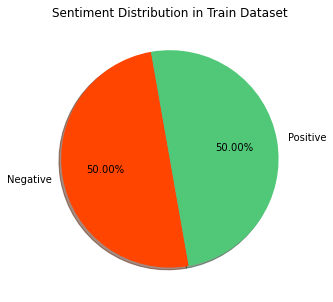

In [19]:
# plotting the sentiment distribution in training set

negative = len(train_df[train_df['sentiment'] == 0])
positive = len(train_df[train_df['sentiment'] == 1])

plt.pie(x=[negative, positive],
        explode=(0, 0),
        labels=['Negative', 'Positive'],
        autopct='%1.2f%%',
        shadow=True,
        startangle=100,
        colors=['#FF4500', '#50C878'])

fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.title('Sentiment Distribution in Train Dataset')
plt.show()

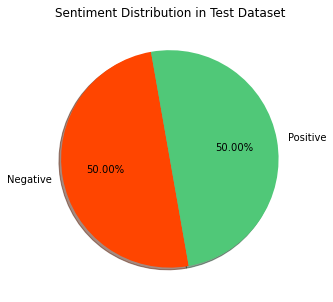

In [20]:
# plotting the sentiment distribution in test set

negative = len(test_df[test_df['sentiment'] == 0])
positive = len(test_df[test_df['sentiment'] == 1])

plt.pie(x=[negative, positive],
        explode=(0, 0),
        labels=['Negative', 'Positive'],
        autopct='%1.2f%%',
        shadow=True,
        startangle=100,
        colors=['#FF4500', '#50C878'])

fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.title('Sentiment Distribution in Test Dataset')
plt.show()

<h5><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>The training and test distribution is stratified by the sentiment labels and have exactly equal distribution. So, we don't need to worry about data
 </span></ul></h5>

In [21]:
# top 50 most frequent words in text
top_N = 50

words = (full_df.review.str.cat(sep=' ').split())
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

In [22]:
rslt[:50].transpose()

Word,of,and,to,is,br,in,it,i,this,that,...,out,about,some,has,what,if,there,more,good,when
Frequency,666757,638669,324337,322800,289379,268079,211041,201951,186690,156801,...,35154,34771,34155,34152,33951,33476,33036,31297,31124,30583


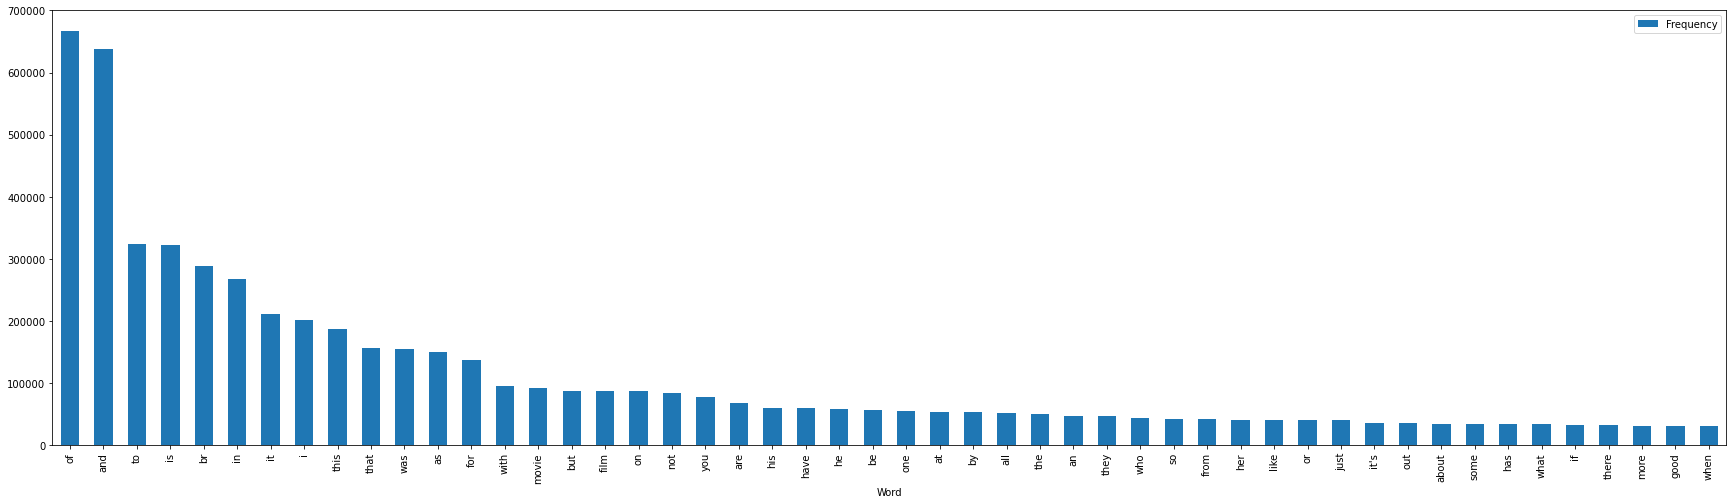

In [23]:
rslt.plot.bar(rot=0, figsize=(30,8), width=0.55)
plt.xticks(rotation=90)
plt.show()

In [24]:
pprint(rslt.index.tolist(), compact=True)

['of', 'and', 'to', 'is', 'br', 'in', 'it', 'i', 'this', 'that', 'was', 'as',
 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'are', 'his',
 'have', 'he', 'be', 'one', 'at', 'by', 'all', 'the', 'an', 'they', 'who', 'so',
 'from', 'her', 'like', 'or', 'just', "it's", 'out', 'about', 'some', 'has',
 'what', 'if', 'there', 'more', 'good', 'when']


<h5><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>Many stopwords are occuring most frequently in the dataset
 </span></ul></h5>

In [25]:
pos_string = ""
pos = full_df.loc[full_df.sentiment == 1, 'review']
for review in pos:
    pos_string += review
    pos_string += " "

neg_string = ""
neg = full_df.loc[full_df.sentiment == 0, 'review']
for review in neg:
    neg_string += review
    neg_string += " "

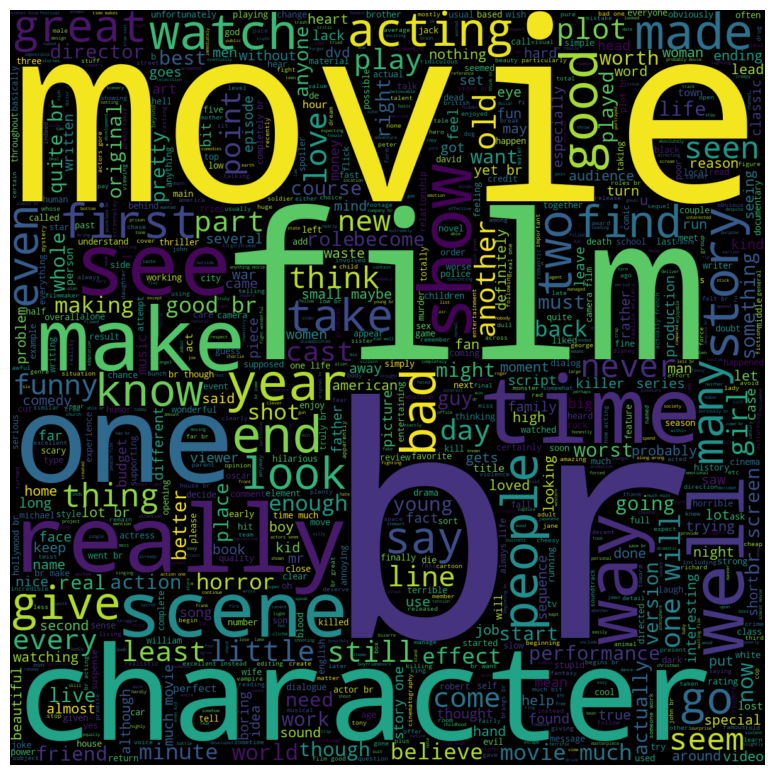

In [26]:
# positive reviews wordcloud
plt.figure(figsize=(10,10), dpi=100)
WC = WordCloud(width=1200, height=1200, max_words=1000, min_font_size=5)
positive_words = WC.generate(pos_string)
plt.imshow(positive_words,interpolation='bilinear')
plt.axis("off")
plt.show()

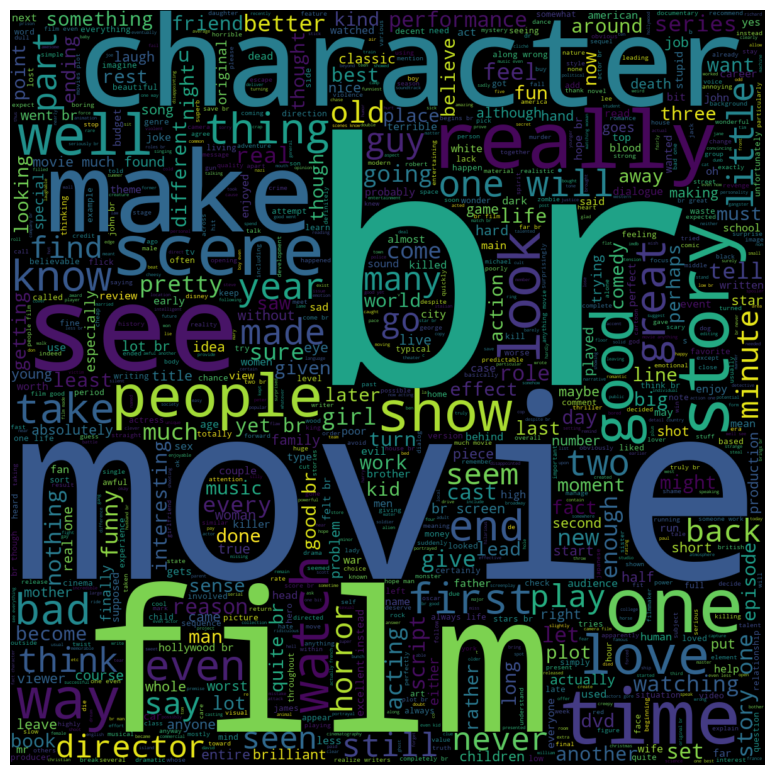

In [27]:
# negative reviews wordcloud
plt.figure(figsize=(10,10), dpi=100)
WC = WordCloud(width=1200, height=1200, max_words=1000, min_font_size=5)
negative_words = WC.generate(neg_string)
plt.imshow(negative_words,interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
def get_length(row):
    row['review_len'] = len(row.review.split())
    return row

full_df = full_df.progress_apply(get_length, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:24<00:00, 2023.46it/s]


In [29]:
full_df.head()

,review,sentiment,review_len
0,the as on after one will is highly child on wh...,0,214
1,the was couldn't try caught that million only ...,1,141
2,the and animation superstar it is remind festi...,0,90
3,the how better episode we sex film is sons is ...,0,157
4,the was start doesn't catch no that how moment...,0,130


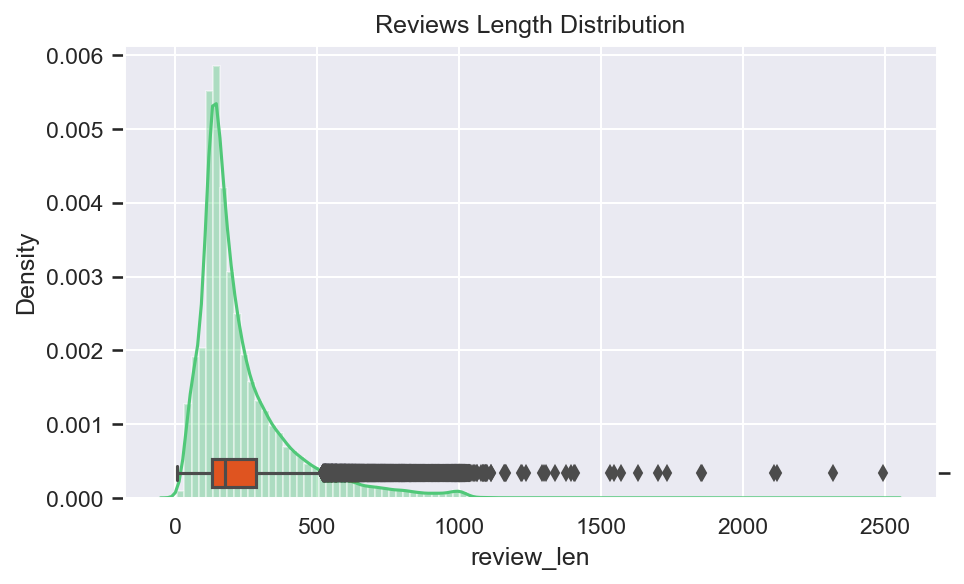

In [30]:
# plotting sign counts distribution\
sns.set()
plt.figure(figsize=(7, 4), dpi=150)
ax = sns.distplot(full_df.review_len, bins=100, kde=True, color='#50C878')
ax_ = ax.twinx()
sns.boxplot(full_df.review_len, color='#FF4500')
ax_.set(ylim=(-.7, 12))
plt.title('Reviews Length Distribution')
plt.show()

In [31]:
full_df.review_len.describe()

count    50000.000000
mean       234.755840
std        172.911307
min          7.000000
25%        129.000000
50%        176.000000
75%        285.000000
max       2494.000000
Name: review_len, dtype: float64

<h5><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>Most review texts have between 129 and 285 with median at 176 and mean at 234 with relatively few outliers ranging till 2494 words!<br>
        We have to cut these reviews to a uniform length and pad sequences lesser than that to be able to pass the data to the model
 </span></ul></h5>

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad sequences to cut longer texts to a uniform length and pad the sentences that are shorter than that with <PAD> token

# using just 20 words from each review will severely limit the information that is 
# available to the model and affect performance although the training will be faster
MAX_LEN = 300

X_train_padded = pad_sequences(X_train,
                               padding='post',
                               truncating='post',
                               maxlen=MAX_LEN)
X_test_padded = pad_sequences(X_test,
                               padding='post',
                               truncating='post',
                               maxlen=MAX_LEN)

print(f'Train: {X_train_padded.shape}\nTest:  {X_test_padded.shape}')

Train: (25000, 300)
Test:  (25000, 300)


In [33]:
pprint(X_train[0], compact=True)

[1, 14, 20, 100, 28, 77, 6, 542, 503, 20, 48, 342, 470, 7, 4, 4, 20, 286, 38,
 76, 4085, 23, 4, 383, 139, 13, 384, 240, 6, 383, 6176, 5, 146, 252, 15, 225, 6,
 176, 53, 15, 271, 23, 19, 383, 2, 1005, 7, 260, 383, 23, 6, 1813, 2857, 488,
 6172, 2, 122, 6, 52, 292, 1069, 51, 32, 29, 69, 8, 81, 63, 286, 76, 33, 31,
 213, 42, 160, 31, 62, 28, 8, 462, 33, 90, 88, 27, 109, 16, 38, 5342, 2, 8035,
 16, 2659, 11, 41, 217, 17, 4, 1947, 383, 2, 59, 2856, 7, 224, 53, 151, 5, 146,
 24, 6899, 41, 260, 383, 4, 415, 15, 3405, 46, 4, 91, 8, 72, 11, 14, 20, 16, 2,
 7135, 11, 41, 1078, 217, 17, 4, 1715, 5, 1947, 322, 225, 142, 44, 307, 1004, 5,
 46, 15, 2303, 6450, 8, 72, 59, 256, 15, 217, 5, 17, 25, 296, 4, 20, 25, 380, 8,
 235, 78, 18, 41, 10, 10, 6914, 7, 6, 383, 6176, 137, 24, 735, 819, 42, 6, 682,
 356, 8, 6283, 1553, 9, 179, 7180, 5, 127, 6, 1257, 292, 11, 800, 25, 89, 2066,
 965, 2624, 70, 193, 120, 5, 2457, 4, 55, 183, 11, 113, 25, 104, 545, 7]


In [34]:
pprint(X_train_padded[0], compact=True)

array([   1,   14,   20,  100,   28,   77,    6,  542,  503,   20,   48,
        342,  470,    7,    4,    4,   20,  286,   38,   76, 4085,   23,
          4,  383,  139,   13,  384,  240,    6,  383, 6176,    5,  146,
        252,   15,  225,    6,  176,   53,   15,  271,   23,   19,  383,
          2, 1005,    7,  260,  383,   23,    6, 1813, 2857,  488, 6172,
          2,  122,    6,   52,  292, 1069,   51,   32,   29,   69,    8,
         81,   63,  286,   76,   33,   31,  213,   42,  160,   31,   62,
         28,    8,  462,   33,   90,   88,   27,  109,   16,   38, 5342,
          2, 8035,   16, 2659,   11,   41,  217,   17,    4, 1947,  383,
          2,   59, 2856,    7,  224,   53,  151,    5,  146,   24, 6899,
         41,  260,  383,    4,  415,   15, 3405,   46,    4,   91,    8,
         72,   11,   14,   20,   16,    2, 7135,   11,   41, 1078,  217,
         17,    4, 1715,    5, 1947,  322,  225,  142,   44,  307, 1004,
          5,   46,   15, 2303, 6450,    8,   72,   

In [35]:
np.unique(X_train[0])

array([   1,    2,    4,    5,    6,    7,    8,    9,   10,   11,   13,
         14,   15,   16,   17,   18,   19,   20,   23,   24,   25,   27,
         28,   29,   31,   32,   33,   38,   41,   42,   44,   46,   48,
         51,   52,   53,   55,   59,   62,   63,   69,   70,   72,   76,
         77,   78,   81,   88,   89,   90,   91,  100,  104,  109,  113,
        120,  122,  127,  137,  139,  142,  146,  151,  160,  176,  179,
        183,  193,  213,  217,  224,  225,  235,  240,  252,  256,  260,
        271,  286,  292,  296,  307,  322,  342,  356,  380,  383,  384,
        415,  462,  470,  488,  503,  542,  545,  682,  735,  800,  819,
        965, 1004, 1005, 1069, 1078, 1257, 1553, 1715, 1813, 1947, 2066,
       2303, 2457, 2624, 2659, 2856, 2857, 3405, 4085, 5342, 6172, 6176,
       6283, 6450, 6899, 6914, 7135, 7180, 8035])

In [36]:
np.unique(X_train_padded[0]) 
# As a convention, "0" does not stand for a 
# specific word, but instead is used to encode any unknown word

array([   0,    1,    2,    4,    5,    6,    7,    8,    9,   10,   11,
         13,   14,   15,   16,   17,   18,   19,   20,   23,   24,   25,
         27,   28,   29,   31,   32,   33,   38,   41,   42,   44,   46,
         48,   51,   52,   53,   55,   59,   62,   63,   69,   70,   72,
         76,   77,   78,   81,   88,   89,   90,   91,  100,  104,  109,
        113,  120,  122,  127,  137,  139,  142,  146,  151,  160,  176,
        179,  183,  193,  213,  217,  224,  225,  235,  240,  252,  256,
        260,  271,  286,  292,  296,  307,  322,  342,  356,  380,  383,
        384,  415,  462,  470,  488,  503,  542,  545,  682,  735,  800,
        819,  965, 1004, 1005, 1069, 1078, 1257, 1553, 1715, 1813, 1947,
       2066, 2303, 2457, 2624, 2659, 2856, 2857, 3405, 4085, 5342, 6172,
       6176, 6283, 6450, 6899, 6914, 7135, 7180, 8035])

In [37]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
def retrieve_review_feat(x, mapping=WORD_TO_INDEX) -> str:
    # increment 3 
    mapping = {k:(v + 3) for k, v in mapping.items()}
    mapping['<PAD>'] = 0
    mapping['<START>'] = 1
    mapping['<UNK>'] = 2
    inv_mapping = {v: k for k, v in mapping.items()}
    return str(" ".join(inv_mapping.get(i, '<NA>') for i in x))

retrieve_review_feat(X_train_padded[0])

"<START> this movie could have been a decent b movie if 3 4 of the the movie wasn't so much focusing on the sex scenes i mean he's a sex addict and i'm sure that there's a lot more that goes on with sex <UNK> outside of having sex on a constant basis michael des <UNK> did a good job considering what all he had to do which wasn't much at one point or another one would have to laugh at him because his character was so pitiful <UNK> kinski was alright in her role as the concerned sex <UNK> she could've of done more though and i'm not suggesting her having sex the person that stood out the most to me in this movie was <UNK> arquette in her convincing role as the loving and concerned wife there's something about beautiful inside and out that strongly appeals to me she played that role and as you watched the movie you start to feel bad for her br br diary of a sex addict while not oscar material or a modern classic to anyone's standards is quite informative and does a fair job in showing you

In [38]:
y_train[0]

0

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Train Sentiment Classifiers</span></strong></li>
</ul></h3>

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Simple Feed-Forward Neural Net</span></strong></li>
</ul></h4>

In [39]:
# !pip install livelossplot
from tensorflow.python.keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm, unit_norm
from tensorflow.python.keras.callbacks import LambdaCallback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization, Dropout, Embedding, LSTM, MaxPooling1D, Conv1D

In [40]:
EMBEDDING_DIM = 300
VOCAB_SIZE, MAX_LEN, EMBEDDING_DIM

(10000, 300, 300)

In [41]:
# define model

model1 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          3000000   
_________________________________________________________________
flatten (Flatten)            (None, 90000)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                5760064   
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 8,761,121
Trainable params: 8,761,121
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Define Callbacks and a few helper functions

# simplify the training log
simple_log = LambdaCallback(
    on_epoch_end = lambda e, l: print(f" ~| Epoch: {e+1} | Validation Loss: {l['val_loss']:.5f}", end =" >|> \n" ))

# early stopping
early_stop = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=7,
                              verbose=0, 
                              restore_best_weights=True)

# learning rate reduction
lr_reduce_on_plateau = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.4,
                                            min_lr=0.00001)

def plot_learning_curve(hist):
    sns.set()
    plt.figure(figsize=(5,5))
    train = hist.history['loss']
    val = hist.history['val_loss']
    epochs_run = range(1,len(train) + 1)
    sns.lineplot(epochs_run, train, marker = 'o', color = 'coral', label = 'Training Loss')
    sns.lineplot(epochs_run, val,  marker = '>', color = 'green', label = 'Validation Loss')
    plt.title("Loss vs. Epochs", fontsize = 20)
    plt.legend()
    plt.show()


In [43]:
# !pip install nvidia-smi
!nvidia-smi

Sat Aug 14 18:41:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 471.68       Driver Version: 471.68       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P2    57W /  N/A |   7004MiB /  8192MiB |     20%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [44]:
import gc
gc.collect()

745

In [45]:
EPOCHS = 200
if tensorflow.test.is_gpu_available():
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h1 = model1.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
else:
    print("Training on CPU:")
    h1 = model1.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on GPU:
 ~| Epoch: 1 | Validation Loss: 0.32735 >|> 
 ~| Epoch: 2 | Validation Loss: 0.46259 >|> 
 ~| Epoch: 3 | Validation Loss: 0.62872 >|> 
 ~| Epoch: 4 | Validation Loss: 0.69863 >|> 
 ~| Epoch: 5 | Validation Loss: 0.72440 >|> 

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 6 | Validation Loss: 0.73674 >|> 
 ~| Epoch: 7 | Validation Loss: 0.74906 >|> 
 ~| Epoch: 8 | Validation Loss: 0.76384 >|> 

Training Done.


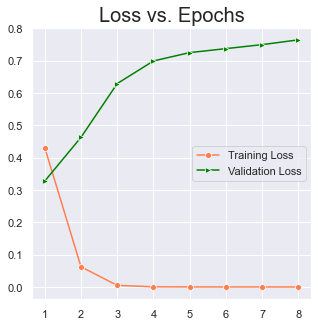

In [46]:
plot_learning_curve(h1)

In [47]:
loss, acc = model1.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

782/782 [==============================] - 4s 5ms/step - loss: 0.3377 - accuracy: 0.8532
Testing Accuracy:  85.32400131225586


<h5><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>This model is clearly overfitting, we will add regularization to the next iteration
 </span></ul></h5>

In [48]:
# define model

model2 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Flatten(),
    Dense(64, activation = 'relu'),
    BatchNormalization(),
    Dense(16, activation = 'relu'),
    BatchNormalization(),
    Dense(1, activation = 'sigmoid')
])

model2.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 90000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                5760064   
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [49]:
EPOCHS = 200
if tensorflow.test.is_gpu_available():
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h2 = model2.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
else:
    print("Training on CPU:")
    h2 = model2.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 0.38920 >|> 
 ~| Epoch: 2 | Validation Loss: 0.44146 >|> 
 ~| Epoch: 3 | Validation Loss: 0.51280 >|> 
 ~| Epoch: 4 | Validation Loss: 0.61769 >|> 
 ~| Epoch: 5 | Validation Loss: 0.61307 >|> 

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 6 | Validation Loss: 0.60527 >|> 
 ~| Epoch: 7 | Validation Loss: 0.65567 >|> 
 ~| Epoch: 8 | Validation Loss: 0.69780 >|> 

Training Done.


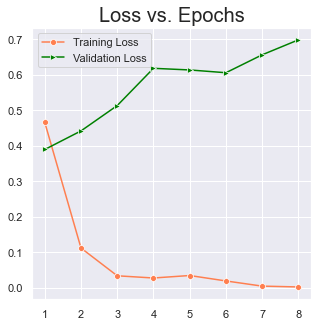

In [50]:
plot_learning_curve(h2)

In [51]:
loss, acc = model2.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

782/782 [==============================] - 4s 5ms/step - loss: 0.4097 - accuracy: 0.8150
Testing Accuracy:  81.49999976158142


In [52]:
# define model

model3 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(16, activation = 'relu'),
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')
])

model3.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 90000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                5760064   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [53]:
EPOCHS = 200
if tensorflow.test.is_gpu_available():
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h3 = model3.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
else:
    print("Training on CPU:")
    h3 = model3.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 0.34435 >|> 
 ~| Epoch: 2 | Validation Loss: 0.42161 >|> 
 ~| Epoch: 3 | Validation Loss: 0.82769 >|> 
 ~| Epoch: 4 | Validation Loss: 0.92191 >|> 
 ~| Epoch: 5 | Validation Loss: 0.83167 >|> 

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 6 | Validation Loss: 0.99332 >|> 
 ~| Epoch: 7 | Validation Loss: 1.00462 >|> 
 ~| Epoch: 8 | Validation Loss: 1.15891 >|> 

Training Done


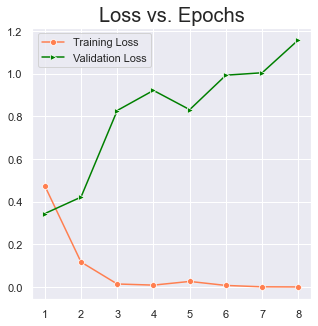

In [54]:
plot_learning_curve(h3)

In [55]:
loss, acc = model3.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

782/782 [==============================] - 4s 4ms/step - loss: 0.3539 - accuracy: 0.8452
Testing Accuracy:  84.51600074768066


<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">LSTM</span></strong></li>
</ul></h4>

In [56]:
# define model

model4 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    LSTM(128),
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')
])

model4.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               219648    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 3,219,777
Trainable params: 3,219,777
Non-trainable params: 0
_________________________________________________________________


In [57]:
EPOCHS = 10
if tensorflow.test.is_gpu_available():
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h4 = model4.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
else:
    print("Training on CPU:")
    h4 = model4.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 0.69157 >|> 
 ~| Epoch: 2 | Validation Loss: 0.68854 >|> 
 ~| Epoch: 3 | Validation Loss: 0.64124 >|> 
 ~| Epoch: 4 | Validation Loss: 0.59840 >|> 
 ~| Epoch: 5 | Validation Loss: 0.65295 >|> 
 ~| Epoch: 6 | Validation Loss: 0.49930 >|> 
 ~| Epoch: 7 | Validation Loss: 0.48867 >|> 
 ~| Epoch: 8 | Validation Loss: 0.46558 >|> 
 ~| Epoch: 9 | Validation Loss: 0.55381 >|> 
 ~| Epoch: 10 | Validation Loss: 0.58168 >|> 

Training Done.


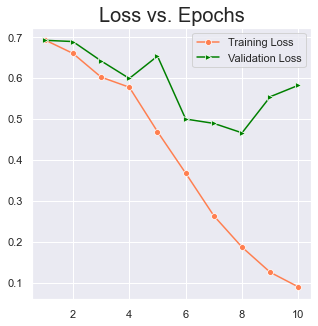

In [58]:
plot_learning_curve(h4)

In [59]:
loss, acc = model4.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

782/782 [==============================] - 8s 11ms/step - loss: 0.6448 - accuracy: 0.8323
Testing Accuracy:  83.2319974899292


In [60]:
model5 = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=256, input_length=MAX_LEN),
    Dropout(0.25),
    Conv1D(256, 5, padding = 'same', activation = 'relu', strides = 1),
    Conv1D(256, 5, padding = 'same', activation = 'relu', strides = 1),
    MaxPooling1D(pool_size = 2),
    Conv1D(64, 5, padding = 'same', activation = 'relu', strides = 1),
    MaxPooling1D(pool_size = 2),
    LSTM(75),
    Dense(1, activation = 'sigmoid')
])

model5.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 256)          2560000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 300, 256)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 300, 256)          327936    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 256)          327936    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 150, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 150, 64)           81984     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 75, 64)           

In [61]:
EPOCHS = 20
if tensorflow.test.is_gpu_available():
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h5 = model5.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
else:
    print("Training on CPU:")
    h5 = model5.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 0.69678 >|> 
 ~| Epoch: 2 | Validation Loss: 0.34191 >|> 
 ~| Epoch: 3 | Validation Loss: 0.31087 >|> 
 ~| Epoch: 4 | Validation Loss: 0.33812 >|> 
 ~| Epoch: 5 | Validation Loss: 0.35492 >|> 
 ~| Epoch: 6 | Validation Loss: 0.50502 >|> 
 ~| Epoch: 7 | Validation Loss: 0.46138 >|> 

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 8 | Validation Loss: 0.55645 >|> 
 ~| Epoch: 9 | Validation Loss: 0.60394 >|> 
 ~| Epoch: 10 | Validation Loss: 0.62687 >|> 

Training Done.


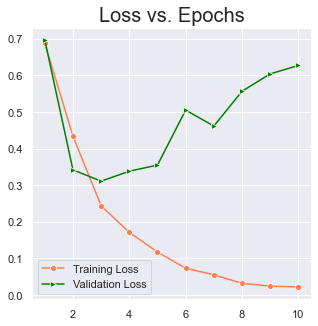

In [62]:
plot_learning_curve(h5)

In [63]:
loss, acc = model5.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

782/782 [==============================] - 9s 11ms/step - loss: 0.3078 - accuracy: 0.8718
Testing Accuracy:  87.18400001525879


<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Use TfIdf vectors instead of Embedding Layer + Feature Selection</span></strong></li>
</ul></h4>

In [64]:
full_df.shape

(50000, 3)

In [65]:
full_df.head()

,review,sentiment,review_len
0,the as on after one will is highly child on wh...,0,214
1,the was couldn't try caught that million only ...,1,141
2,the and animation superstar it is remind festi...,0,90
3,the how better episode we sex film is sons is ...,0,157
4,the was start doesn't catch no that how moment...,0,130


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = np.array(full_df['review'])
y = np.array(full_df['sentiment'])

# using 75-25 split instead of 50-50 split as we need more data to train neural nets
X_train_vec, X_test_vec, y_train_vec, y_test_vec = train_test_split(X, y, test_size=0.2, random_state=seed)
print(f"Train dataset shape: {X_train_vec.shape}, \nTest dataset shape: {X_test_vec.shape}")

Train dataset shape: (40000,), 
Test dataset shape: (10000,)


In [80]:
NGRAM_RANGE = (1, 2)
TOP_K = 20000
TOKEN_MODE = 'word'
MIN_DOC_FREQ = 2


kwargs = {
    'ngram_range' : NGRAM_RANGE,
    'dtype' : 'int32',
    'strip_accents' : 'unicode',
    'decode_error' : 'replace',
    'analyzer' : TOKEN_MODE,
    'min_df' : MIN_DOC_FREQ
}
vectorizer = TfidfVectorizer(**kwargs)
X_train_vec = vectorizer.fit_transform(X_train_vec)
X_test_vec = vectorizer.transform(X_test_vec)
print(f"Train dataset shape: {X_train_vec.shape}, \nTest dataset shape: {X_test_vec.shape}")

Train dataset shape: (40000, 476713), 
Test dataset shape: (10000, 476713)


In [81]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select best k features, with feature importance measured by f_classif
# Set k as 20000 or (if number of ngrams is less) number of ngrams   
selector = SelectKBest(f_classif, k=min(TOP_K, X_train_vec.shape[1]))
selector.fit(X_train_vec, y_train_vec)
X_train_vec = selector.transform(X_train_vec).astype('float32')
X_test_vec = selector.transform(X_test_vec).astype('float32')
X_train_vec = X_train_vec.toarray()
X_test_vec = X_test_vec.toarray()

print(f"Train dataset shape: {X_train.shape}, \nTest dataset shape: {X_test.shape}")

Train dataset shape: (25000,), 
Test dataset shape: (25000,)


In [82]:
model6 = Sequential([   
    Dense(64, activation='relu', input_shape=X_train_vec.shape[1:]),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model6.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                1280064   
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 1,281,121
Trainable params: 1,281,121
Non-trainable params: 0
_________________________________________________________________


In [83]:
EPOCHS = 20
if tensorflow.test.is_gpu_available():
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h6 = model6.fit(
            X_train_vec, y_train_vec,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop],
            verbose = False)
else:
    print("Training on CPU:")
    h6 = model6.fit(
            X_train_vec, y_train_vec,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 0.19254 >|> 
 ~| Epoch: 2 | Validation Loss: 0.19831 >|> 
 ~| Epoch: 3 | Validation Loss: 0.24831 >|> 
 ~| Epoch: 4 | Validation Loss: 0.29893 >|> 
 ~| Epoch: 5 | Validation Loss: 0.37933 >|> 
 ~| Epoch: 6 | Validation Loss: 0.42783 >|> 
 ~| Epoch: 7 | Validation Loss: 0.49943 >|> 
 ~| Epoch: 8 | Validation Loss: 0.53805 >|> 

Training Done.


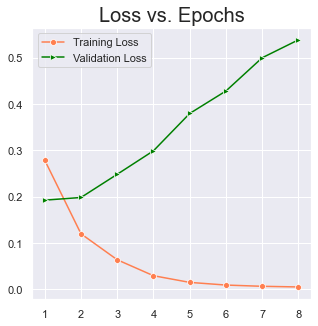

In [84]:
plot_learning_curve(h6)

In [85]:
loss, acc = model6.evaluate(X_test_vec, y_test_vec)
print("Testing Accuracy: ", acc*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.2109 - accuracy: 0.9181
Testing Accuracy:  91.80999994277954


<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Metrics: </span></strong></li>
</ul></h3>

<table style="width:100%">
  <tr>
    <th>Model</th>
    <th>Test Accuracy</th>
  </tr>
  <tr>
    <td>Simple Feed-Forward Net using Embedding Layer</td>
    <td>85.32</td>
  </tr>
<tr>
    <td>Feed-Forward + Batch Norm</td>
    <td>81.49</td>
  </tr>
<tr>
    <td>Feed-Forward + Dropout</td>
    <td>84.51</td>
  </tr>
  <tr>
    <td>LSTM</td>
    <td>83.23</td>
  </tr>
<tr>
    <td>Convolution Blocks (Dimensionality Reduction) + LSTM</td>
    <td>87.18</td>
  </tr>
<tr>
    <td>TfIdf Vectors + Better train-test split + Feature Selection + Feed-forward Neural Net</td>
    <td>91.81</td>
  </tr>
</table>

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">So, the model acheived an accuracy of 91.81. We, choose the test accuracy as the final metric to benchamrk models as the classes are balanced (no heavy imbalance to skew accuracy metrics) and we have a good distribution in both train and test datasets. Also, we're interested in performance on both the classes. To improve the accurac further, we can use BERT or other Transformer-based classifiers which use Attention Mechanism and are generally much better at text classification tasks.</span></strong></li>
</ul></h4>

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Use the designed model to print the prediction on any one sample</span></strong></li>
</ul></h3>

In [86]:
def predict_sentiment(text: str, actual_sentiment: int,
                      vectorizer=vectorizer,
                      selector=selector,
                      classifier=model6):
    '''helper function to predict sentiment given text'''
    label_to_sentiment = {1: 'Positive', 0: 'Negative'}
    vec = vectorizer.transform([text])
    features = selector.transform(vec).astype('float32').toarray()
    predicted_sentiment = round(classifier.predict(features)[0][0])
    print(f'Predicted Sentiment: {label_to_sentiment.get(predicted_sentiment, "ERR")}')
    print(f'Actual Sentiment:    {label_to_sentiment.get(actual_sentiment, "ERR")}')

In [87]:
# select a few random review from dataset
for _ in range(5):
    idx = random.choice(range(len(test_df)))
    random_review = test_df.review.iloc[idx]
    actual_sentiment = test_df.sentiment.iloc[idx]
    # print review
    pprint(random_review, compact=True)
    
    # prediction
    predict_sentiment(random_review, actual_sentiment)
    print("")

('the of on and br fans are of and ending who excitement crashes it by film '
 'over in even design to there so family and just little top what have one '
 "you're of ending them have does for over in score br of five their minutes "
 'something than maybe first of on this of ending more it her get for it half '
 'she in of flying to was might for for it by br of lot for could of ending '
 "when it that so despite story at no and suddenly blows i'll to they're which "
 'higher science but and to for problem scenes with half some br of on cast '
 "what have one you're of ending them have story does for as scenes this of "
 'ending it by for family stinker of watched stand br and where case was might '
 "for of on with movies ok to generation his that's old with maybe this in of "
 "i've che to don't for way of their when that it hilarious i i what have one "
 "his you're of ending and br prefers of anonymous reminiscent mistress them "
 "then and man my this league it's bus of on take w

In [88]:
# random movie review taken from imdb as an out sample test
# 3 Idiots
# https://www.imdb.com/title/tt1187043/
oos_review = '''
It's hard for me to review this film, as I have not seen a huge number of Indian films--probably no more than a couple dozen. Most of the ones I've seen were wonderfully entertaining but I am far from an expert on Bollywood. Because of this, I have a hard time knowing how good this film is relative to other films from this country. So, consider this when you read this review. This may be among the very best India has to offer or it just seems that way to me.

Like so many Indian films, this is a very, very long film--with a run-time of almost three hours. When a movie is bad or just okay, this can seem like forever, but since "3 Idiots" is a very, very good film I loved its length. And, like most films of the genre, it has its share of the usual singing and dancing so foreign to films from other countries. One thing you should know, however, is that defining the type of film it is isn't really easy. Much of it is a comedy, but it also has many poignant moments (keep the Kleenex nearby), some existential moments where they explore the meaning of life and work and it's also a tender film about friendship. And, as my daughter pointed out when she saw the film, she loved that the men in the movie are not afraid to cry--something you rarely see in western films.

As for the plot, it's very long and involved and I could recount what occurs. But I don't want to spoil a single wonderful moment, so my advice is just sit back and watch--and if you give it a chance, I can almost guarantee you'll have a great time with this poignant and funny film. Wonderful and well worth your time--with a delightful script, wonderful characters and lots of moments that made me smile...and a few that brought me to tears. See this film.
'''

In [89]:
predict_sentiment(oos_review, 1)

Predicted Sentiment: Positive
Actual Sentiment:    Positive
